In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [ ]:
data=pd.read_csv("Instagram data.csv",encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [ ]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
data=data.dropna()

<ipython-input-5-9683e0cd5d6f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


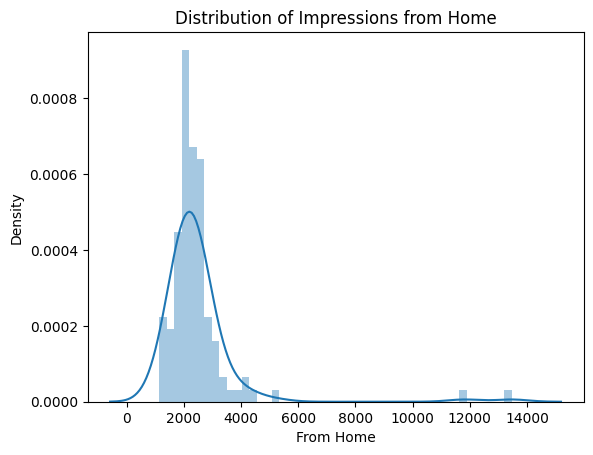

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.figure(figsize=(10,10))
plt.show()

<ipython-input-6-d2900fa25e63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


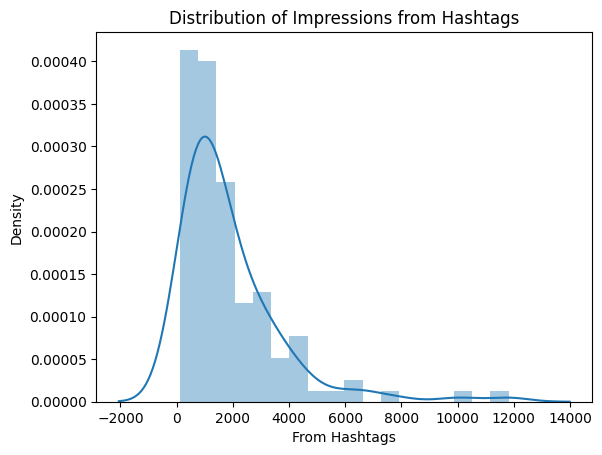

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.figure(figsize=(10,10))
plt.show()

<ipython-input-7-cd34b7b58567>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


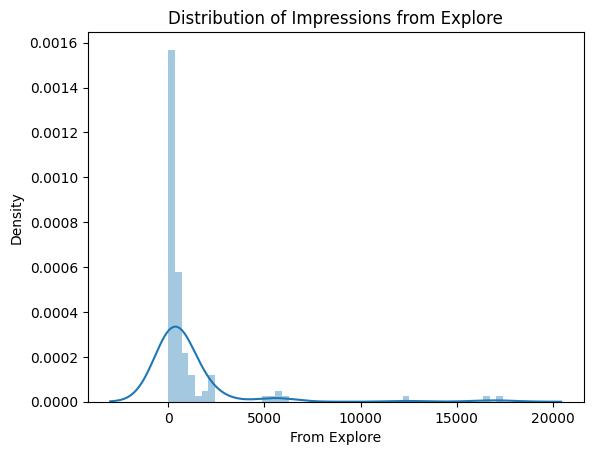

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
home=data["From Home"].sum()
hashtag=data["From Hashtags"].sum()
explore=data["From Explore"].sum()
other=data["From Other"].sum()
label=['From Home','From Hashtags','From explore','From others']
values=[home,hashtag,explore,other]
plt.figure(figsize=(8,6))
fig=px.pie(data,names=label,values=values,title='Impressions on Instagram Posts From Various Sources')

fig.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Relationship between Likes and Impressions')

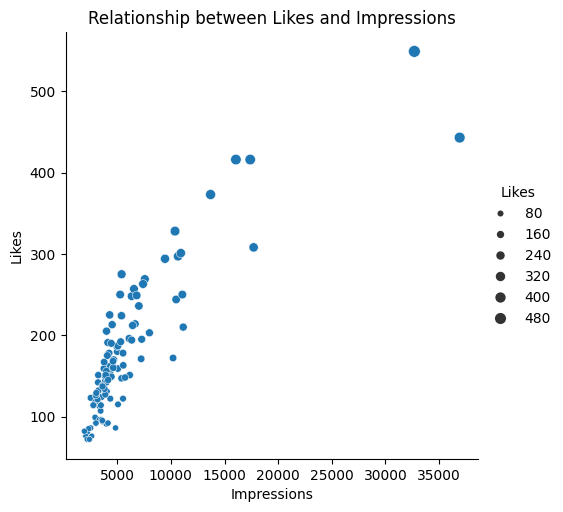

In [ ]:

sns.relplot(data,x="Impressions",y="Likes",size="Likes")

plt.title('Relationship between Likes and Impressions')


Text(0.5, 1.0, 'Relationship between Comments and Impressions')

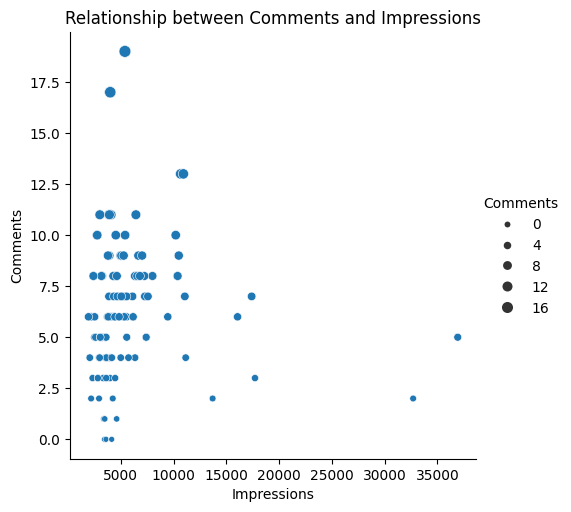

In [ ]:
sns.relplot(data,x="Impressions",y="Comments",size="Comments")

plt.title('Relationship between Comments and Impressions')

Text(0.5, 1.0, 'Relationship between Shares and Impressions')

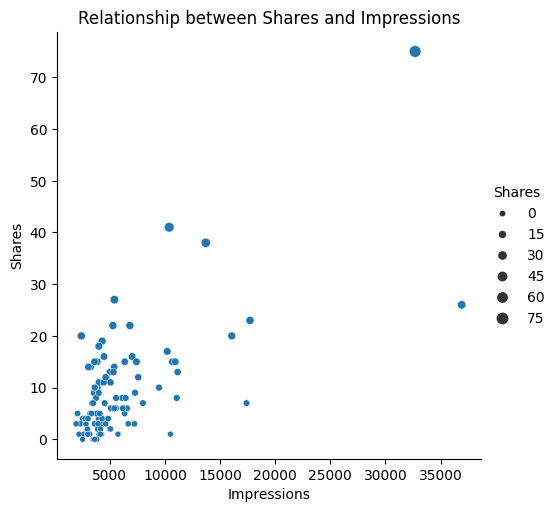

In [ ]:
sns.relplot(data,x="Impressions",y="Shares",size="Shares")

plt.title('Relationship between Shares and Impressions')

Text(0.5, 1.0, 'Relationship between Saves and Impressions')

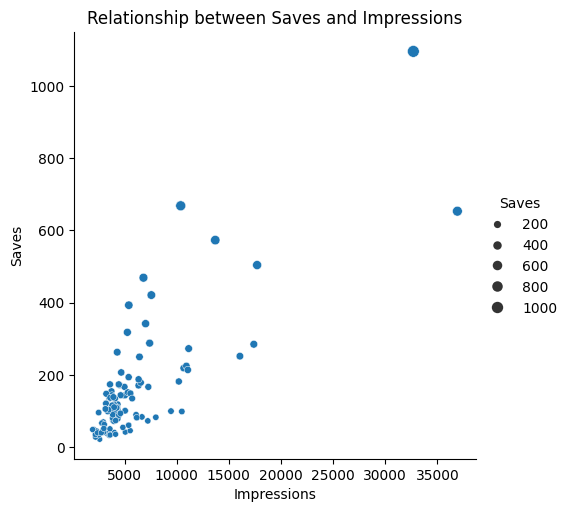

In [ ]:
sns.relplot(data,x="Impressions",y="Saves",size="Saves")

plt.title('Relationship between Saves and Impressions')

Text(0.5, 1.0, 'Relationship between Profile Visits and Followers Gained')

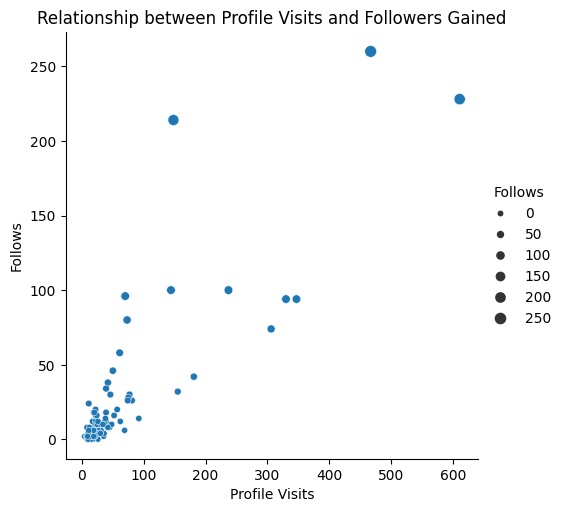

In [ ]:
sns.relplot(data,x="Profile Visits",y="Follows",size="Follows")

plt.title('Relationship between Profile Visits and Followers Gained')

In [ ]:
correlation=data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-14-53cf506fee56>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Analysing Conversion Rate

In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


Instagram Reach Prediction Model

In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8499150324719983

Predicting Instagram Reach using Machine Learning Model

In [ ]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([14165.59932836])